In [14]:
# 到入包与数据集
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

wine = load_wine()

In [15]:
# Classification分类问题,Y值离散
# RandomForestClassifier : 每一个弱分类器是DecisionTreeClassifier

# Regression回归问题，Y值连续
# RandomForestRegressor : 每一个弱分类器是DecisionTreeRegressor

In [13]:
X = wine['data']
Y = wine['target']
# data = pd.DataFrame(X, columns = wine['feature_names'])
# data['label'] = Y
# data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [39]:
# 切分数据集并且开始上算法
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [40]:
# 直接上算法
clf = DecisionTreeClassifier(random_state = 0).fit(Xtrain, Ytrain)
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(Xtrain, Ytrain)
print(clf.score(Xtrain, Ytrain), clf.score(Xtest, Ytest))
print(rfc.score(Xtrain, Ytrain), rfc.score(Xtest, Ytest))

1.0 0.9259259259259259
1.0 0.9814814814814815


0.865032679738562 0.9833333333333332


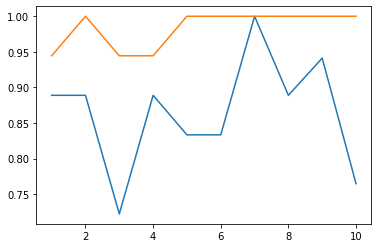

In [42]:
# 我们的目的就是查看，是否决策树的效果总是没有随机森林的效果好
# 尝试对比决策树和随机森林的一次交叉验证的结果

from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state = 3)
rfc = RandomForestClassifier(n_estimators = 100, random_state = 3)
cv_score_clf = cross_val_score(clf, X, Y, cv = 10)
cv_score_rfc = cross_val_score(rfc, X, Y, cv = 10)

# 这只是一次交叉验证，查看这一次交叉验证下，在10个不同测试集下，单个决策树与随机森林算法的表现
print(cv_score_clf.mean(), cv_score_rfc.mean())
plt.plot(range(1, 11), cv_score_clf)
plt.plot(range(1, 11), cv_score_rfc)

[]

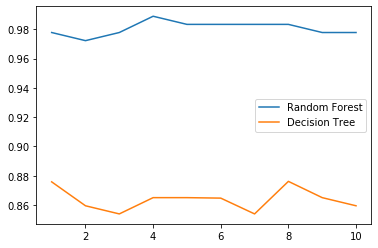

In [34]:
# 尝试多次交叉验证的结果，并且对比
# for循环开始多次交叉验证

rfc_l = []  # 记录每一次循环下，随机森林的交叉验证的平均数
clf_l = []  # 记录每一次循环下，决策树的交叉验证的平均数

for _ in range(10):
    rfc = RandomForestClassifier(n_estimators = 100)
    rfc_l.append(cross_val_score(rfc, X, Y, cv = 10).mean())
    
    clf = DecisionTreeClassifier()
    clf_l.append(cross_val_score(clf, X, Y, cv = 10).mean())
    
plt.plot(range(1, 11), rfc_l, label = 'Random Forest')
plt.plot(range(1, 11), clf_l, label = 'Decision Tree')
plt.legend()
plt.plot()

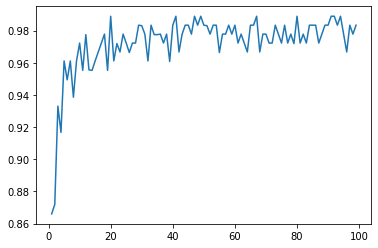

In [43]:
# 尝试给出n的学习曲线

superpa = []
for i in range(1, 100):
    rfc = RandomForestClassifier(n_estimators = i)
    superpa.append(cross_val_score(rfc, X, Y, cv = 10).mean())
plt.plot(range(1, 100), superpa)

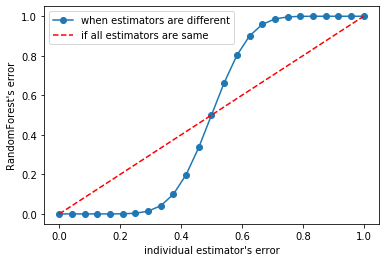

In [46]:
# 尝试看一下随机森林的最低单颗树的条件， 每一个单个决策树，要保证误差率至少在50%以下

import numpy as np
from scipy.special import comb

x = np.linspace(0,1,25)
y = []
for epsilon in np.linspace(0,1,25):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
                  for i in range(13,26)]).sum()
    y.append(E)

#绘制图形
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

In [72]:
# 决策树的randomstate + splitter='best'是用来控制单个模型的形状的
# 在做决策树特征选择的过程中，为了保证一个好的泛化能力，它会随机的从最优的那几个特征(信息增益最大几个特征)当中来选取某一个特征做切分，splitter='best'时，也是有随机性的
# 但是随机性非常小，只有在特征非常多的情况下，样本量很大情况下才会体现出来。在当前数据集下面，样本量少，特征也少，我们通过设置random_state得到树模型是都是一样
# 如何splitter = 'random', 随机性就开始变的很大的。

# 随机森林里面的random_state，控制一片树的形状

clf = DecisionTreeClassifier(random_state = 100).fit(Xtrain, Ytrain)
print(clf.random_state)
rfc = RandomForestClassifier(n_estimators = 20, random_state = 101).fit(Xtrain, Ytrain)

100


In [74]:
1 - np.exp(-1)

0.6321205588285577

In [70]:
# 随机森林的重要属性之一：estimators_，查看森林每一个树的状况
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=70431583),
 DecisionTreeClassifier(max_features='auto', random_state=225658379),
 DecisionTreeClassifier(max_features='auto', random_state=303514961),
 DecisionTreeClassifier(max_features='auto', random_state=1944264518),
 DecisionTreeClassifier(max_features='auto', random_state=122295871),
 DecisionTreeClassifier(max_features='auto', random_state=2080686679),
 DecisionTreeClassifier(max_features='auto', random_state=736679933),
 DecisionTreeClassifier(max_features='auto', random_state=5713995),
 DecisionTreeClassifier(max_features='auto', random_state=795758575),
 DecisionTreeClassifier(max_features='auto', random_state=146505097),
 DecisionTreeClassifier(max_features='auto', random_state=1434076109),
 DecisionTreeClassifier(max_features='auto', random_state=1242715688),
 DecisionTreeClassifier(max_features='auto', random_state=1318409860),
 DecisionTreeClassifier(max_features='auto', random_state=331385407),
 DecisionTreeClass

In [136]:
# oob_score

rfc = RandomForestClassifier(n_estimators = 100, oob_score = True).fit(Xtrain, Ytrain)
#rfc.oob_score_

In [99]:
# 查看其它重要的接口
# rfc.estimators_

rfc.score(Xtrain, Ytrain), rfc.score(Xtest, Ytest)
rfc.predict(Xtest)
rfc.predict_proba(Xtest)
rfc.feature_importances_

array([0.14286221, 0.02025982, 0.01155707, 0.02887199, 0.02057189,
       0.0526968 , 0.12934359, 0.01164436, 0.02514484, 0.17694516,
       0.1039624 , 0.12139102, 0.15474885])

In [115]:
# 可以使用for循环，使用列表解析式，[i for i in ],提取出随机森林里面每一个决策树的.feature_importance

np.array([i.feature_importances_ for i in rfc.estimators_]).mean(axis = 0)

# 通过我们的探索，当前随机森林里面的特征重要性，就是将每一个单颗决策树里面特征重要性做一个平均

array([0.14286221, 0.02025982, 0.01155707, 0.02887199, 0.02057189,
       0.0526968 , 0.12934359, 0.01164436, 0.02514484, 0.17694516,
       0.1039624 , 0.12139102, 0.15474885])

In [118]:
rfc.predict_proba(Xtest[:5, :])

array([[0.98, 0.01, 0.01],
       [0.4 , 0.51, 0.09],
       [0.98, 0.01, 0.01],
       [0.98, 0.01, 0.01],
       [0.01, 0.08, 0.91]])

In [121]:
# 尝试探索随机森林的predict_proba，是不是由每一个决策树的predict_proba结果做了个平均所得到的

np.array([i.predict_proba(Xtest[:5, :]) for i in rfc.estimators_]).mean(axis = 0)

array([[0.98, 0.01, 0.01],
       [0.4 , 0.51, 0.09],
       [0.98, 0.01, 0.01],
       [0.98, 0.01, 0.01],
       [0.01, 0.08, 0.91]])

In [123]:
#rfc.apply(Xtest[:5, :])

In [143]:
# 对于boston房价，尝试使用随机森林回归

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X = boston['data']
Y = boston['target']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [145]:
# 实例化模型，训练训练集，看下训练集下和测试集下的R平方的分数
# 这里可能有一点过拟合，但是还是要指出，回归类问题，测试集上R平方的分数大约达到90%已经是一个非常好的模型
# 同学们可以尝试来使用网格搜索做一些剪枝的处理，看下是否可以进一步的提高测试集上R平方的分数
rfr = RandomForestRegressor(n_estimators = 100).fit(Xtrain, Ytrain)
rfr.score(Xtrain, Ytrain), rfr.score(Xtest, Ytest)

(0.9767462811486778, 0.8824044494173817)

In [154]:
# 我们对比线性回归的R平方
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(Xtrain)
Xtrain_ = std.transform(Xtrain)
Xtest_ = std.transform(Xtest)

LR = LinearRegression().fit(Xtrain_, Ytrain)
LR.score(Xtrain_, Ytrain), LR.score(Xtest_, Ytest)

(0.7611598772034454, 0.6771696999851694)

In [165]:
# 随机森林回归使用交叉验证，并且设置score为-MSE来进行交叉验证

cross_val_score(rfr, X, Y, cv = 5, 
                 scoring = 'neg_mean_absolute_error'
                 #scoring = 'r2'
                )

array([-2.08316667, -2.55963366, -3.53940594, -3.78040594, -3.22712871])

In [166]:
# 线性回归使用交叉验证，并且设置score为-MSE来进行交叉验证
cross_val_score(LR, X, Y, cv = 5, 
                scoring = 'neg_mean_absolute_error'
                #scoring = 'r2'
               )

array([-2.62190565, -3.90725478, -4.386606  , -5.57073637, -4.76333993])

In [157]:
# 在交叉验证这个包里面scoring的取值有哪一些
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [176]:
# 手写一个随机森林，首先模拟一些数据

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

X, Y = make_classification(n_samples=1000, n_features=30,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

# 首先将数据连在一起，这是因为后面需要使用sample的方式做随机的样本提取
data = pd.DataFrame(X)
data['label'] = Y

In [177]:
# 开始手写
# 设置一些基分类器的参数值
n_estimatros = 100
criterion = 'gini'
max_depth = 5
bootstrap = False
random_state = 420
max_features = 'auto'

# 对每一个基分类器来说，都需要一个randomstate
np.random.seed(random_state)
random_seed_list = (np.random.rand(n_estimatros) * n_estimatros * 100).astype(int)


# 判断bootstrap值，如果是True，使用随机采样，可以使用pandas的sample的方式设置replace = True, 有放回的随机采样
# 如果值为False，每一个基分类器都使用一样的样本
if bootstrap:
    data_list = [data.sample(data.shape[0], replace = True) for _ in range(n_estimatros)]
else:
    data_list = [data] * n_estimatros

# 使用列表解析式，造很多基分类器，将上面的参数都传入这些基分类器
estimators_ = [DecisionTreeClassifier(criterion = criterion,
                                      max_depth = max_depth,
                                      random_state = i,
                                      max_features = max_features
                                      #,splitter = 'random'
                                     ).fit(data.iloc[:, :-1], data['label']) for i in random_seed_list]


In [178]:
# 预测数据
Xtest = data.iloc[:, :-1]
Ytest = data['label']

# 所有的基分类器都predict一下数据，并且predict_proba的数据提取出来
predict_log_list = np.array([i.predict_proba(Xtest) for i in estimators_])

# 将每一个数值都算一下平均数
predict_proba = predict_log_list.mean(axis = 0)

# 将每一个样本在每一个类别下的概率取一个最大值，将预测出的结果存在predict里面
predict = predict_proba.argmax(axis = 1)


In [179]:
from sklearn.metrics import accuracy_score
# 计算准确率
accuracy_score(predict, Y)

0.971

In [181]:
# 包装成一个函数
def frank_rf(X, Y,
             n_estimatros = 100,
             criterion = 'gini',
             max_depth = 5,
             random_state = None,
             max_features = 'auto',
             bootstrap = False
            ):
    data = pd.DataFrame(X)
    data['label'] = Y
    
    if random_state is not None:
        np.random.seed(random_state)
    random_seed_list = (np.random.rand(n_estimatros) * n_estimatros * 100).astype(int)
    
    if bootstrap:
        data_list = [data.sample(data.shape[0], replace = True) for _ in range(n_estimatros)]
    else:
        data_list = [data] * n_estimatros

    estimators_ = [DecisionTreeClassifier(criterion = criterion,
                                          max_depth = max_depth,
                                          random_state = int(i * n_estimatros * 1000),
                                          max_features = max_features
                                          #,splitter = 'random'
                                         ).fit(data.iloc[:, :-1], data['label']) for i in random_seed_list]
    feature_importances_list = np.array([i.feature_importances_ for i in estimators_])
    feature_importances_ = feature_importances_list.mean(axis = 0)
    #print(feature_importances_list)
    return estimators_, feature_importances_

def rf_predict(X, Y, estimators_):
    predict_log_list = np.array([i.predict_proba(X) for i in estimators_])
    predict_proba = predict_log_list.mean(axis = 0)
    Y_pred = predict_proba.argmax(axis = 1)
    score = accuracy_score(Y, Y_pred)
    return Y_pred, score

In [191]:
# 测试运行并且和sklearn的来进行比较
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 10)
estimators_, feature_importances_ = frank_rf(Xtrain, Ytrain, n_estimatros = 100, max_depth = 5)

pred_y_train, score_train = rf_predict(Xtrain, Ytrain, estimators_)
pred_y_test, score_test = rf_predict(Xtest, Ytest, estimators_)

# 我自己写的模型的训练集和测试集上的表现
score_train, score_test

(0.9742857142857143, 0.9366666666666666)

In [192]:
# sklearn下随机森林的表现

sklearn_rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5).fit(Xtrain, Ytrain)
sklearn_rfc.score(Xtrain, Ytrain), sklearn_rfc.score(Xtest, Ytest)

# 结果差不多

(0.9728571428571429, 0.9366666666666666)

In [11]:
# 使用树回归模型来做房价预测

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import sklearn

In [13]:
# Adaboost

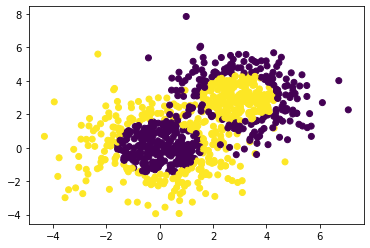

In [14]:
# 导入包与数据集

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)

# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)

#将两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [15]:
# 开始使用adaboost
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20,min_samples_leaf=5),
                         algorithm="SAMME",n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=20,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                           

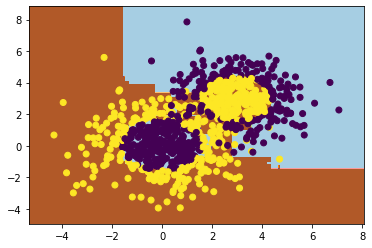

In [16]:
# 画图，这里就是了解一下不用太过于深入研究

# 坐标矩阵，其实有大量的重复——X的每一行都一样，Y的每一列都一样。
#基于这种强烈的规律性，numpy提供的numpy.meshgrid()函数可以让我们快速生成坐标矩阵X,Y

#语法：X,Y = numpy.meshgrid(x, y)
#输入的x，y，就是网格点的横纵坐标列向量（非矩阵）
#输出的X，Y，就是坐标矩阵。

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()]) ##np.c_，类似于np.vstack的功能  拉平！
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [ ]:
# 在不同的学习率下查看分数

In [ ]:
# 模拟另外一组数据

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# Create the dataset
rng = np.random.RandomState(1)          
X = np.linspace(0, 6, 100).reshape(-1,1)  
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [ ]:
# 画出决策树的图出来

regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X, y)
# Predict
y_1 = regr_1.predict(X)
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="DTR", linewidth=2)

In [ ]:
# 画出adaboost的图出来

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)
regr_2.fit(X, y)
y_2 = regr_2.predict(X)
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_2, c="r", label="ABR", linewidth=2)

In [ ]:
# 将两个图放在一起进行比较
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="DTR", linewidth=2)
plt.plot(X, y_2, c="r", label="ABR", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()